In [ ]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=fcf63c71fe41704cf80d0cea71d4519f858cdce06f77b05488aec192801d9d04
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 10.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import lime
from lime import lime_image
import shap
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
39744/40000 [============================>.] - ETA: 0s - loss: 1.6813 - accuracy: 0.3757

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


40000/40000 [==============================] - 13s 328us/sample - loss: 1.6792 - accuracy: 0.3765 - val_loss: 1.3923 - val_accuracy: 0.4879
Epoch 2/10
40000/40000 [==============================] - 7s 167us/sample - loss: 1.3066 - accuracy: 0.5302 - val_loss: 1.1835 - val_accuracy: 0.5772
Epoch 3/10
40000/40000 [==============================] - 7s 168us/sample - loss: 1.1245 - accuracy: 0.6011 - val_loss: 1.0240 - val_accuracy: 0.6343
Epoch 4/10
40000/40000 [==============================] - 3s 85us/sample - loss: 1.0139 - accuracy: 0.6429 - val_loss: 0.9995 - val_accuracy: 0.6468
Epoch 5/10
40000/40000 [==============================] - 4s 88us/sample - loss: 0.9295 - accuracy: 0.6744 - val_loss: 0.9506 - val_accuracy: 0.6617
Epoch 6/10
40000/40000 [==============================] - 4s 103us/sample - loss: 0.8569 - accuracy: 0.6978 - val_loss: 0.9422 - val_accuracy: 0.6727
Epoch 7/10
40000/40000 [==============================] - 4s 90us/sample - loss: 0.7961 - accuracy: 0.7202 - val

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


  0%|          | 0/1000 [00:00<?, ?it/s]

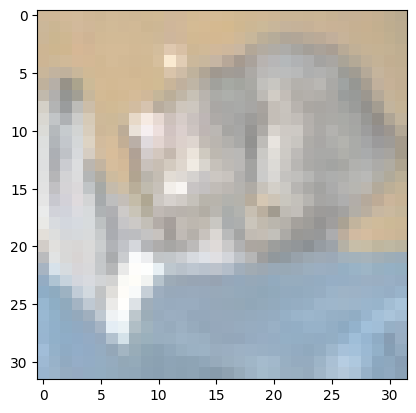

In [ ]:
explainer = lime_image.LimeImageExplainer()
predicted_class = np.argmax(model.predict(x_test[0:1]), axis=1)[0]
explanation = explainer.explain_instance(x_test[0], model.predict, labels=[predicted_class], top_labels=5, hide_color=0, num_samples=1000)

temp, mask = explanation.get_image_and_mask(predicted_class, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


In [ ]:
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
explainer_shap = shap.DeepExplainer(model, background)
shap_values = explainer_shap.shap_values(x_test[:100])

shap.image_plot(shap_values, -x_test[:100])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
